# Link to Raw Algorithm Code
#### https://github.com/aymankhan2003/aymankhan2003.github.io/blob/main/posts/perceptron/perceptron.py

# Perceptron Update

In [1]:
def fit(self, X, y, max_steps):
    n_samples, n_features = X.shape
    self.w = np.random.rand(n_features+1, )
        
    for _ in range(self.max_steps):
        j = np.random.randint(X.shape[0])
        xi = np.append(X[j], 1)
        y_hat = np.dot(xi, self.w)
        yi = 2*y[j] - 1
        self.w += (yi * (np.dot(xi, self.w)) < 0) * yi*xi
                    
        accuracy = self.score(X, y)
        self.history.append(accuracy)
        if self.history[_] == 1:
            break 

The major element in this update of the data plots is the fit function from the perceptron class. In order to introduce an extra bias with the value 1 to the input data, we start by randomly integrating the weights vector and adding one to n features. Our loop, where j defines a random index is taken from the number of samples in the input data "X," is carried out with an iteration of max steps. X[j] appends 1 alongside to make the vector consistent with the weights vector. The anticipated output, denoted by the dot product of x and the weights, is denoted by y_hat, while the actual output, denoted by yi, transforms Y[j] to either 1 or -1. The weights are then updated using the loss function, and the accuracy of the perceptron point is then monitored by looking at the score history. We terminate when the history adding reaches its final iteration, which is 1, which indicates that all samples have been correctly classified.

# Example 1

### Using 2d data we check if the data is linearly separable then the perceptron algorithm converges to weight vector w^tilde describing a separating line:

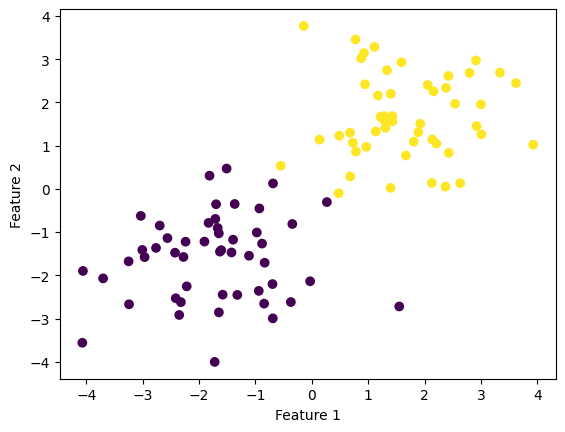

In [2]:
from perceptron import Perceptron
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.datasets import make_blobs

np.random.seed(12345)

n = 100
p_features = 3

X, y = make_blobs(n_samples = 100, n_features = p_features - 1, centers = [(-1.7, -1.7), (1.7, 1.7)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

p = Perceptron()
p.fit(X, y, max_steps = 1000)

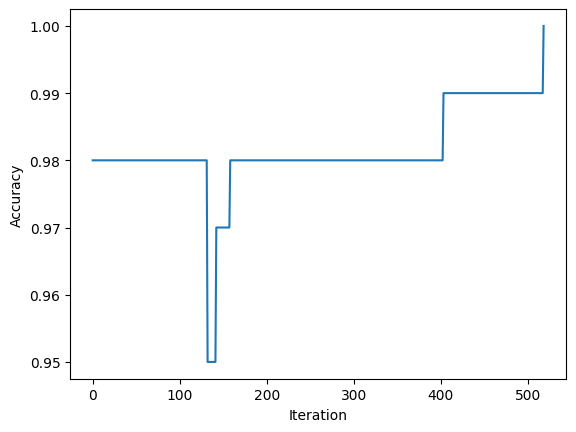

In [4]:
fig = plt.plot(p.history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")

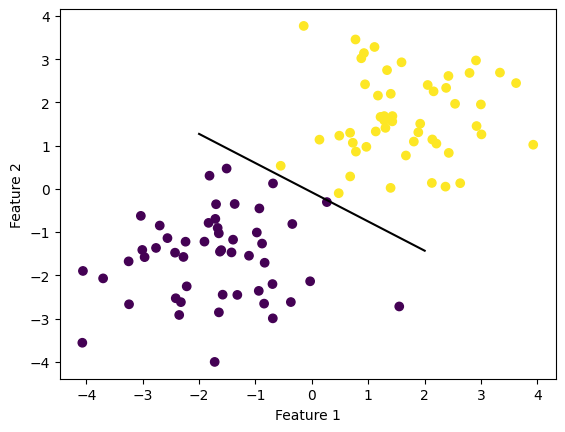

In [5]:
def draw_line(w, x_min, x_max):
  x = np.linspace(x_min, x_max, 101)
  y = -(w[0]*x + w[2])/w[1]
  plt.plot(x, y, color = "black")

fig = plt.scatter(X[:,0], X[:,1], c = y)
fig = draw_line(p.w, -2, 2)

xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

# Example 2

### Using 2d data again, when the data is not linearly separable, the perceptron algorithm will not settle on a final value of w^tilde, but will instead run until the maximum number of iterations is reached, without achieving perfect accuracy:

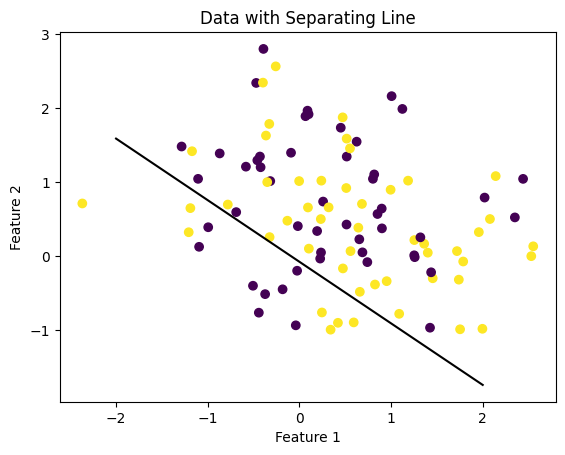

In [6]:
n = 100 
p_features = 3 

X, y = make_blobs(n_samples = 100, n_features = p_features - 1, centers = [(0.5, 0.5), (0.5, 0.5)])

p = Perceptron() 
p.fit(X, y, max_steps = 1000)

fig = plt.scatter(X[:,0], X[:,1], c = y)
fig = draw_line(p.w, -2, 2)

xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

plt.title("Data with Separating Line")

plt.show()

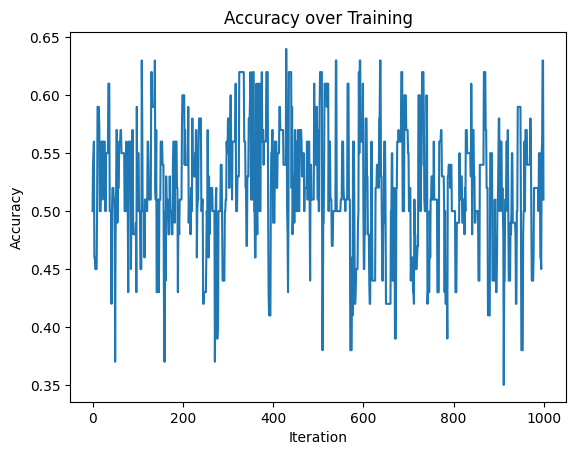

In [7]:
accuracy_fig = plt.plot(p.history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")

plt.title("Accuracy over Training")

plt.show()

# Example 3

### The perceptron algorithm is also thought to be able to work in more than 2 dimensions, we can check if it actually does:

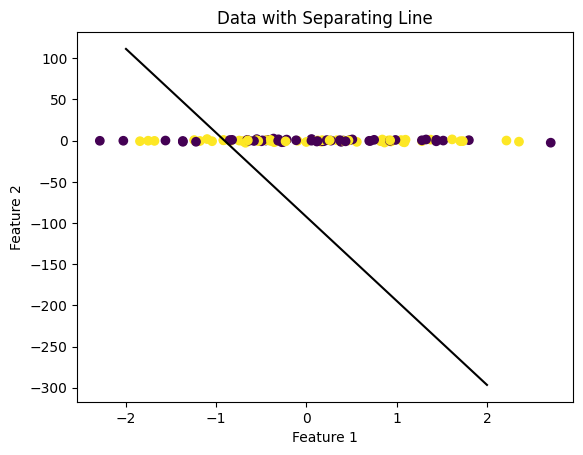

In [8]:
n = 100 
p_features = 5

X, y = make_blobs(n_samples = 100, n_features = p_features, centers = np.random.uniform(-1, 1, (2, p_features)))


p = Perceptron()
p.fit(X,y, max_steps = 1000)

fig = plt.scatter(X[:,0], X[:,1], c = y)
fig = draw_line(p.w, -2, 2)

xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

plt.title("Data with Separating Line")

plt.show()

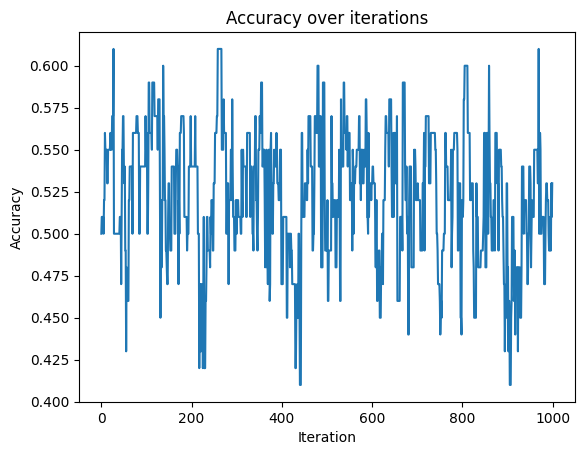

In [9]:
accuracy_fig = plt.plot(p.history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")
plt.title("Accuracy over iterations")

plt.show()

# Time Complexity of Perceptron Algorithm Update

##### The perceptron algorithm update has a runtime complexity of O(p), where p is the number of features. This is due to the dot product operation, which requires O(p) time, between the input vector xi and the weight vector self.w. The remaining operations are independent of the number of features and have constant time complexity.